In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import cv2
import numpy as np

# Load the dataset
data = fetch_olivetti_faces()
images = data.images
targets = data.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
# Select two classes (e.g., person 0 and person 1)
mask = np.isin(targets, [0, 1])
images = images[mask]
targets = targets[mask]


In [ ]:
n_samples, h, w = images.shape
X = images.reshape(n_samples, -1)  # Flatten the images
y = targets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [ ]:
# Function to resize images to the size used during training
def resize_image(image, size=(w, h)):
    return cv2.resize(image, size)

# Start capturing video from the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Resize the captured frame to match the training image size
    resized_face = resize_image(gray)
    flattened_face = resized_face.flatten().reshape(1, -1)

    # Predict the identity
    pred = clf.predict(flattened_face)
    prob = clf.predict_proba(flattened_face)

    # Display the result
    label = f"Person: {pred[0]}, Probability: {prob[0][pred[0]]:.2f}"
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    cv2.imshow("Frame", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

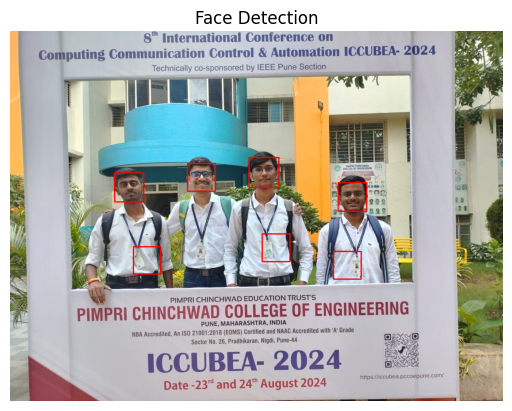

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the photograph (use the correct file path)
image_path = "/content/photo.jpeg"  # Provide the full path to your image
pixels = cv2.imread(image_path)

# Convert BGR image (used by OpenCV) to RGB (used by Matplotlib)
pixels_rgb = cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB)

# Load the pre-trained model (provide the full path to XML file if needed)
cascade_path = '/content/haarcascade_frontalface_default.xml'  # Full path to Haar Cascade
classifier = cv2.CascadeClassifier(cascade_path)

# Perform face detection
bboxes = classifier.detectMultiScale(pixels)

# Check if any faces were detected
if len(bboxes) == 0:
    print("No faces detected")
else:
    # Print bounding box for each detected face
    for box in bboxes:
        x, y, width, height = box
        x2, y2 = x + width, y + height
        # Draw a rectangle over the pixels
        cv2.rectangle(pixels_rgb, (x, y), (x2, y2), (255, 0, 0), 2)  # Blue rectangle in RGB

    # Use Matplotlib to display the image
    plt.imshow(pixels_rgb)
    plt.title('Face Detection')
    plt.axis('off')  # Hide axes
    plt.show()
